Imports

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np
import os
import json
import seaborn as sns
import pandas as pd
from scipy.spatial import KDTree
import pickle
import pandas as pd
from pandas.plotting import table

Bar functions

In [2]:
def create_bar_graph(tuples, x_label, y_label, title, pdf_name):
    # Unpack the coordinates into categories and values
    x_values, y_values = zip(*tuples)
    
    # Dynamically adjust figure size for readability
    plt.figure(figsize=(max(10, len(x_values) * 0.5), 6))  # Adjust figure width based on number of x_values
    
    # Create the bar graph
    bars = plt.bar(x_values, y_values)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha="right")  # Rotate labels and align right for better readability
    
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

def create_stacked_multi_bar_graph(tuples, x_label, y_label, labels, colors, title, pdf_name):
    plt.figure()
    bottom_values = [0] * len(tuples[0])  # Initialize bottom values for stacking
    
    # Ensure colors length matches labels length
    assert len(colors) == len(labels), "Colors length must match labels length."
    
    for index, data_tuples in enumerate(tuples):
        x_values, y_values = zip(*data_tuples)
        plt.bar(x_values, y_values, label=labels[index], bottom=bottom_values, color=colors[index])
        # Update bottom values for the next series
        bottom_values = [i + j for i, j in zip(bottom_values, y_values)]

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

def create_side_by_side_multi_bar_graph(tuples, x_label, y_label, labels, colors, title, pdf_name):
    plt.figure()
    num_groups = len(tuples[0])  # Number of groups
    num_bars = len(tuples)  # Number of bars in each group
    bar_width = 0.8 / num_bars  # Width of each bar
    
    # Ensure colors length matches labels length
    assert len(colors) == len(labels), "Colors length must match labels length."
    
    # Calculate the positions for each group
    index = range(num_groups)
    
    for i, data_tuples in enumerate(tuples):
        x_values, y_values = zip(*data_tuples)
        # Calculate the position of each bar within the group
        positions = [x + (i * bar_width) for x in index]
        
        plt.bar(positions, y_values, width=bar_width, label=labels[i], color=colors[i])
    
    # Adjust x-axis ticks
    plt.xticks([r + bar_width * (num_bars / 2 - 0.5) for r in range(num_groups)], [x[0] for x in tuples[0]])
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

def create_3d_bar_graphic(tuples,x_label, y_label, z_label,title,pdf_name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Unpack the tuples into x, y, and z values
    x, y, top = zip(*tuples)

    bottom = np.create_multi_line_graph_with_point_labelszeros_like(top)
    width = depth = 1

    # Use a colormap to change the color of the bars based on their height
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.array(top) / max(top))

    ax.bar3d(x, y, bottom, width, depth, top, color=colors, shade=True)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(title)
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

Line Graphs

In [3]:
def create_line_graph(tuples, x_label, y_label, title,pdf_name):
    # Unpack the tuples into x and y values
    x_values, y_values = zip(*tuples)
    
    # Create the line graph
    plt.figure()
    plt.plot(x_values, y_values, label=title, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

def create_line_graph_with_point_labels(tuples, x_label, y_label, title,pdf_name):
    # Unpack the tuples into x, y values, and labels
    x_values, y_values, labels = zip(*tuples)
    
    # Create the line graph
    plt.figure()
    plt.plot(x_values, y_values, label=title, color='blue')
    
    # Add a label to each point
    for x, y, label in tuples:
        plt.text(x, y, label, color='black', fontsize=8)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

def create_multi_line_graph_with_point_labels(lines_data, x_label, y_label, title,pdf_name):
    plt.figure()
    
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for index, (points, line_name) in enumerate(lines_data):
        # Unpack the x, y coordinates and labels from each point
        x_values, y_values, point_labels = zip(*[(x, y, label) for x, y, label in points])
        
        color = colors[index % len(colors)]
        plt.plot(x_values, y_values, label=line_name, color=color)
        
        # Add labels to each point
        for x, y, label in zip(x_values, y_values, point_labels):
            plt.text(x, y, label, color=color, fontsize=8)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

lines_data = [
    ([(1, 2,"point_label1"), (2, 3,"point_label2"), (3, 4,"point_label3")], "Line 1"),
    ([(1, 3,"point_label4"), (2, 4,"point_label5"), (3, 5,"point_label6")], "Line 2"),
    ([(1, 4,"point_label"), (2, 5,"point_label"), (3, 6,"point_label")], "Line 3")
]

x_label = "X Axis"
y_label = "Y Axis"
title = "Multi-Line Graph with Labels"

def create_multi_line_graph(lines_data, x_label, y_label, title,pdf_name,extra_label_legend):
    plt.figure()
    
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for index, (points, line_name) in enumerate(lines_data):
        # Unpack the x, y coordinates from each point
        x_values, y_values = zip(*points)
        
        color = colors[index % len(colors)]
        plt.plot(x_values, y_values, label="{} {}".format(line_name,extra_label_legend), color=color)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

# Example usage
lines_data = [
    ([(1, 2), (2, 3), (3, 4)], "Line 1"),
    ([(1, 3), (2, 4), (3, 5)], "Line 2"),
    ([(1, 4), (2, 5), (3, 6)], "Line 3")
]

Scatter Plot

In [4]:
def create_scatter_graph(tuples, x_label, y_label, title,pdf_name):
    # Unpack the tuples into x and y values
    x_values, y_values = zip(*tuples)
    
    # Create the scatter graph
    plt.figure()
    plt.scatter(x_values, y_values, label=title, color='blue')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()  

def create_3d_scatter_plot(tuples, x_label, y_label, z_label, title,pdf_name):
    # Extract x, y, and z values from the tuples
    x_values, y_values, z_values = zip(*tuples)
    
    # Normalize the color values based on z_values for a gradient effect
    colors = z_values
    norm = plt.Normalize(min(colors), max(colors))
    colors = plt.cm.viridis(norm(colors))  # Choose 'viridis' or any other colormap
    
    # Create a new figure for the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Create the scatter plot with color mapping
    scatter = ax.scatter(x_values, y_values, z_values, c=colors, marker='o')
    
    # Set the labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(title)
    
    # Optional: Add a color bar to indicate the scale of z_values
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('Z Value Scale')
    plt.savefig(pdf_name)  # Export to PDF
    # Display the plot
    plt.show()


Other Graphics Functions

In [5]:
def create_3d_surface_plot(coordinates, x_label, y_label, z_label, title,pdf_name):
    # Extract x_values, y_values, and z_values from the list of tuples
    x_values = [coord[0] for coord in coordinates]
    y_values = [coord[1] for coord in coordinates]
    z_values = [coord[2] for coord in coordinates]
    
    # Convert lists to numpy arrays for meshgrid operation
    X, Y = np.meshgrid(sorted(set(x_values)), sorted(set(y_values)))
    
    # Create a 2D array for Z values
    Z = np.zeros_like(X)
    for i, x in enumerate(sorted(set(x_values))):
        for j, y in enumerate(sorted(set(y_values))):
            for coord in coordinates:
                if coord[0] == x and coord[1] == y:
                    Z[j, i] = coord[2]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Create the surface plot
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, shrink=0.5, aspect=5)  # Add a color bar to indicate the values of Z
    
    # Set labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(title)
    plt.savefig(pdf_name)  # Export to PDF
    plt.show()

def create_box_plot(data, title, x_label, y_label,pdf_name):
    # Latency data for different cryptopuzzle complexities
    data = {
        'Low': [120, 115, 130, 140, 124],
        'Medium': [150, 145, 160, 155, 148],
        'High': [180, 175, 190, 185, 178]
    }
    
    # Preparing data and labels for the box plot
    data_values = list(data.values())
    labels = list(data.keys())

    # Creating the box plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    box = plt.boxplot(data_values, labels=labels, patch_artist=True)

    # Generate colors from a colormap
    num_boxes = len(data_values)
    colors = cm.viridis(np.linspace(0, 1, num_boxes))

    # Apply colors to each box
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Adding title and labels
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.savefig(pdf_name)  # Export to PDF
    # Display the plot
    plt.show()

Table Functions

In [18]:
def create_table(data, columns_labels, pdf_name):
    df = pd.DataFrame(data, columns=columns_labels)
    
    # Calculate figure size based on the number of rows and columns
    num_rows, num_cols = df.shape
    fig_width = num_cols * 2  # Adjust the scaling factor as needed
    fig_height = num_rows * 0.5  # Adjust the scaling factor as needed
    
    # Create figure and axis for the table
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    ax.axis('tight')
    ax.axis('off')
    
    # Add the table to the axis
    ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure to a PDF file with tight bounding box
    plt.savefig(pdf_name, bbox_inches='tight')
    
def create_table_side_by_side(data, columns_labels, pdf_name):
    df = pd.DataFrame(data, columns=columns_labels)
    
    # Split DataFrame into two halves
    midpoint = len(df) // 2
    df1 = df.iloc[:midpoint]
    df2 = df.iloc[midpoint:]
    
    # Create figure and axes for the tables
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed
    ax1.axis('tight')
    ax1.axis('off')
    ax2.axis('tight')
    ax2.axis('off')
    
    # Add first half of the table to the first axis
    ax1.table(cellText=df1.values, colLabels=df1.columns, loc='center', cellLoc='center')
    
    # Add second half of the table to the second axis
    ax2.table(cellText=df2.values, colLabels=df2.columns, loc='center', cellLoc='center')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure to a PDF file
    plt.savefig(pdf_name, bbox_inches='tight')

Utils Functions

In [7]:
def get_jsons(directory):
    test_results = []
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            with open(os.path.join(directory, filename), 'r') as f:
                test_results.append(json.load(f))
    return test_results

def average_json_fields(folders, result_folder_name, fields_to_average):
    json_objects = {}
    # Step 1: Collect all JSON objects, not just specified field values
    for folder in folders:
        for filename in os.listdir(folder):
            if filename.endswith('.json'):
                with open(os.path.join(folder, filename), 'r') as f:
                    data = json.load(f)
                    if filename not in json_objects:
                        json_objects[filename] = {'values': {field: [] for field in fields_to_average}, 'template': data}
                    for field in fields_to_average:
                        if field in data:
                            json_objects[filename]['values'][field].append(min(data[field],10))
    
    # Step 2: Calculate the average for specified fields and prepare the template object
    for filename, info in json_objects.items():
        for field in fields_to_average:
            if info['values'][field]:  # Check if there are any values collected for the field
                avg_value = sum(info['values'][field]) / len(info['values'][field])
                info['template'][field] = avg_value  # Modify field in the template
    
    # Step 3: Create the result folder if it doesn't exist
    result_folder_path = os.path.join(os.getcwd(), result_folder_name)
    os.makedirs(result_folder_path, exist_ok=True)
    
    # Step 4: Write the modified template objects to new JSON files
    for filename, info in json_objects.items():
        result_file_path = os.path.join(result_folder_path, filename)
        with open(result_file_path, 'w') as f:
            json.dump(info['template'], f)

#Saving binary data to a pickle file
def save_to_pickle(data, filename):
    with open(filename, 'wb') as file:
        pickle.dump(data, file)

# Loading binary data from a pickle file
def load_from_pickle(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)
    
def transform_map_to_graphic_format(map):
    #sort map by key
    map = dict(sorted(map.items()))
    data = []
    for (key,value) in map.items():
        data.append((value,key))
    return data

Average runs

In [12]:
folders = ['../benchmark/latency0', '../benchmark/latency1', '../benchmark/latency2', '../benchmark/latency3', '../benchmark/latency4', '../benchmark/latency5']
result_folder_name = '../benchmark/latency'
fields_to_average = ['retreive_latency', 'publish_latency']  # Specify the fields to be averaged
average_json_fields(folders, result_folder_name, fields_to_average)

Save Jsons

In [13]:
test_results_publish_scalability = get_jsons('../benchmark/publish')
save_to_pickle(test_results_publish_scalability, './pickle/jsons/test_results_publish_scalability.pickle')
test_results_retrieve_scalability = get_jsons('../benchmark/retrieve')
save_to_pickle(test_results_retrieve_scalability, './pickle/jsons/test_results_retrieve.pickle')
test_results_latency = get_jsons('../benchmark/latency/')
save_to_pickle(test_results_latency, './pickle/jsons/test_results_latency.pickle')

Load Jsons

In [8]:
test_results_publish_scalability = load_from_pickle('./pickle/jsons/test_results_publish_scalability.pickle')
test_results_retrieve_scalability = load_from_pickle('./pickle/jsons/test_results_retrieve.pickle')
test_results_latency = load_from_pickle('./pickle/jsons/test_results_latency.pickle')


# JSON examples
### Latency
```json
{"deaddrops":3,"allowed_receivers":1,"allowed_publishers":2,"difficulty":12,"mode":"fully-restricted","acceptance_window":100,"publish_latency":1.917521821,"retreive_latency":2.521151016}
```
### Publish Scalability
```json
{"clients":300,"difficulty":8,"message_size":128,"prepared_messages":500,"acceptance_window":100,"messages":[{"client":0,"message":0,"timestamp":1720530792.837251,"latency":2.922506332397461},{"client":0,"message":1,"timestamp":1720530795.7597888,"latency":0.0065708160400390625}]}
```
### Receive Scalability
```json
{"clients":1,"runtime":30,"difficulty":8,"message_size":128,"message_count":1,"acceptance_window":100,"message_fetches":[{"client":0,"fetch":0,"timestamp":1720605786.5641716,"latency":1.0121777057647705},{"client":0,"fetch":1,"timestamp":1720605787.5763502,"latency":0.035182952880859375}]}
```

# Build Graphics

Prepare Data for Latency

In [9]:
mode_latency_publish = []
mode_latency_retrieve = []
deaddrops_latency_publish = []
deaddrops_latency_retrieve = []
cryptopuzzle_latency_publish = []
cryptopuzzle_latency_retrieve = []
sender_restricted_as_latency_publish = []
sender_restricted_as_latency_retrieve = []
receiver_restricted_ar_latency_publish = []
receiver_restricted_ar_latency_retrieve = []
fully_restricted_as_ar_latency_publish = []
fully_restricted_as_ar_latency_retrieve = []

def map_performance_metrics(jsons_performance,mode_latency_publish,mode_latency_retrieve,deaddrops_latency_publish,deaddrops_latency_retrieve,cryptopuzzle_latency_publish,cryptopuzzle_latency_retrieve,sender_restricted_as_latency_publish,sender_restricted_as_latency_retrieve,receiver_restricted_ar_latency_publish,receiver_restricted_ar_latency_retrieve,fully_restricted_as_ar_latency_publish,fully_restricted_as_ar_latency_retrieve): 

    count_mode_publish = { "open": [], "sender-restricted": [], "receiver-restricted": [], "fully-restricted": []}
    count_mode_retrieve = { "open": [], "sender-restricted": [], "receiver-restricted": [], "fully-restricted": []}
    count_deaddrops_publish = { "3": [], "5": [], "7": [], "9": []}
    count_deaddrops_retrieve = { "3": [], "5": [], "7": [], "9": []}
    count_cryptopuzzle_publish = { "12": [], "16": [], "20": []}
    count_cryptopuzzle_retrieve = { "12": [], "16": [], "20": []}
    count_as_publish = {"2":[], "4":[], "8":[], "16":[], "32":[], "64":[]}
    count_as_retrieve = {"2":[], "4":[], "8":[], "16":[], "32":[], "64":[]}
    count_ar_publish = {"1": [], "2":[], "4":[], "8":[], "16":[], "32":[], "64":[], "128":[]}
    count_ar_retrieve = {"1": [], "2":[], "4":[], "8":[], "16":[], "32":[], "64":[], "128":[]}
    count_as_ar_publish = {f"{allowed_senders}_{allowed_receivers}":[] for allowed_senders in [2,4,8,16,32,64] for allowed_receivers in [1,2,4,8,16,32,64,128]}
    count_as_ar_retrieve = {f"{allowed_senders}_{allowed_receivers}":[] for allowed_senders in [2,4,8,16,32,64] for allowed_receivers in [1,2,4,8,16,32,64,128]}

    for json in jsons_performance:     
        allowed_receivers = json['allowed_receivers']
        allowed_senders = json['allowed_senders']
        deaddrops = json['deaddrops']
        crypto_difficulty = json['difficulty']
        latency_publish = json['publish_latency']
        latency_retrieve = json['retreive_latency']
        mode = json['mode']

        count_mode_publish[mode].append(latency_publish)
        count_mode_retrieve[mode].append(latency_retrieve)
        count_deaddrops_publish[str(deaddrops)].append(latency_publish)
        count_deaddrops_retrieve[str(deaddrops)].append(latency_retrieve)
        count_cryptopuzzle_publish[str(crypto_difficulty)].append(latency_publish)
        count_cryptopuzzle_retrieve[str(crypto_difficulty)].append(latency_retrieve)
        
        if mode == "sender-restricted":
            count_as_publish[str(allowed_senders)].append(latency_publish)
            count_as_retrieve[str(allowed_senders)].append(latency_retrieve)

        if mode == "receiver-restricted":
            count_ar_publish[str(allowed_receivers)].append(latency_publish)
            count_ar_retrieve[str(allowed_receivers)].append(latency_retrieve)            
            
        if mode == "fully-restricted":
            count_as_ar_publish[f"{allowed_senders}_{allowed_receivers}"].append(latency_publish)
            count_as_ar_retrieve[f"{allowed_senders}_{allowed_receivers}"].append(latency_retrieve)

    for mode in count_mode_publish:
        if mode == "sender-restricted":
            mode_latency_publish.append(("publisher-restricted",sum(count_mode_publish["sender-restricted"])/len(count_mode_publish["sender-restricted"])))
            mode_latency_retrieve.append(("publisher-restricted",sum(count_mode_retrieve["sender-restricted"])/len(count_mode_retrieve["sender-restricted"])))
        else:
            mode_latency_publish.append((mode,sum(count_mode_publish[mode])/len(count_mode_publish[mode])))
            mode_latency_retrieve.append((mode,sum(count_mode_retrieve[mode])/len(count_mode_retrieve[mode])))  

    for deaddrops in count_deaddrops_publish:
        deaddrops_latency_publish.append((str(deaddrops),sum(count_deaddrops_publish[deaddrops])/len(count_deaddrops_publish[deaddrops])))
        deaddrops_latency_retrieve.append((str(deaddrops),sum(count_deaddrops_retrieve[deaddrops])/len(count_deaddrops_retrieve[deaddrops])))

    for difficulty in count_cryptopuzzle_publish:
        cryptopuzzle_latency_publish.append((str(difficulty),sum(count_cryptopuzzle_publish[difficulty])/len(count_cryptopuzzle_publish[difficulty])))
        cryptopuzzle_latency_retrieve.append((str(difficulty),sum(count_cryptopuzzle_retrieve[difficulty])/len(count_cryptopuzzle_retrieve[difficulty])))

    for allowed_senders in count_as_publish:
        sender_restricted_as_latency_publish.append((str(allowed_senders),sum(count_as_publish[allowed_senders])/len(count_as_publish[allowed_senders])))
        sender_restricted_as_latency_retrieve.append((str(allowed_senders),sum(count_as_retrieve[allowed_senders])/len(count_as_retrieve[allowed_senders])))

    for allowed_receivers in count_ar_publish:
        receiver_restricted_ar_latency_publish.append((str(allowed_receivers),sum(count_ar_publish[allowed_receivers])/len(count_ar_publish[allowed_receivers])))
        receiver_restricted_ar_latency_retrieve.append((str(allowed_receivers),sum(count_ar_retrieve[allowed_receivers])/len(count_ar_retrieve[allowed_receivers])))

    for key in count_as_ar_publish:
        fully_restricted_as_ar_latency_publish.append((key,sum(count_as_ar_publish[key])/len(count_as_ar_publish[key])))
        fully_restricted_as_ar_latency_retrieve.append((key,sum(count_as_ar_retrieve[key])/len(count_as_ar_retrieve[key])))
    
    fully_restricted_as_ar_latency_retrieve = sorted(fully_restricted_as_ar_latency_retrieve, key=lambda x: x[0])

Build Graphics Latency

In [23]:
map_performance_metrics(test_results_latency,mode_latency_publish,mode_latency_retrieve,deaddrops_latency_publish,deaddrops_latency_retrieve,cryptopuzzle_latency_publish,cryptopuzzle_latency_retrieve,sender_restricted_as_latency_publish,sender_restricted_as_latency_retrieve,receiver_restricted_ar_latency_publish,receiver_restricted_ar_latency_retrieve,fully_restricted_as_ar_latency_publish,fully_restricted_as_ar_latency_retrieve)

save_to_pickle(mode_latency_publish, './pickle/latency/mode_latency_publish.pickle')
save_to_pickle(mode_latency_retrieve, './pickle/latency/mode_latency_retrieve.pickle')
save_to_pickle(deaddrops_latency_publish, './pickle/latency/deaddrops_latency_publish.pickle')
save_to_pickle(deaddrops_latency_retrieve, './pickle/latency/deaddrops_latency_retrieve.pickle')
save_to_pickle(cryptopuzzle_latency_publish, './pickle/latency/cryptopuzzle_latency_publish.pickle')
save_to_pickle(cryptopuzzle_latency_retrieve, './pickle/latency/cryptopuzzle_latency_retrieve.pickle')
save_to_pickle(sender_restricted_as_latency_publish, './pickle/latency/sender_restricted_as_latency_publish.pickle')
save_to_pickle(sender_restricted_as_latency_retrieve, './pickle/latency/sender_restricted_as_latency_retrieve.pickle')
save_to_pickle(receiver_restricted_ar_latency_publish, './pickle/latency/receiver_restricted_ar_latency_publish.pickle')
save_to_pickle(receiver_restricted_ar_latency_retrieve, './pickle/latency/receiver_restricted_ar_latency_retrieve.pickle')
save_to_pickle(fully_restricted_as_ar_latency_publish, './pickle/latency/fully_restricted_as_ar_latency_publish.pickle')
save_to_pickle(fully_restricted_as_ar_latency_retrieve, './pickle/latency/fully_restricted_as_ar_latency_retrieve.pickle')


In [9]:
mode_latency_publish = load_from_pickle('./pickle/latency/mode_latency_publish.pickle')
mode_latency_retrieve = load_from_pickle('./pickle/latency/mode_latency_retrieve.pickle')
deaddrops_latency_publish = load_from_pickle('./pickle/latency/deaddrops_latency_publish.pickle')
deaddrops_latency_retrieve = load_from_pickle('./pickle/latency/deaddrops_latency_retrieve.pickle')
cryptopuzzle_latency_publish = load_from_pickle('./pickle/latency/cryptopuzzle_latency_publish.pickle')
cryptopuzzle_latency_retrieve = load_from_pickle('./pickle/latency/cryptopuzzle_latency_retrieve.pickle')
sender_restricted_as_latency_publish = load_from_pickle('./pickle/latency/sender_restricted_as_latency_publish.pickle')
sender_restricted_as_latency_retrieve = load_from_pickle('./pickle/latency/sender_restricted_as_latency_retrieve.pickle')
receiver_restricted_ar_latency_publish = load_from_pickle('./pickle/latency/receiver_restricted_ar_latency_publish.pickle')
receiver_restricted_ar_latency_retrieve = load_from_pickle('./pickle/latency/receiver_restricted_ar_latency_retrieve.pickle')
fully_restricted_as_ar_latency_publish = load_from_pickle('./pickle/latency/fully_restricted_as_ar_latency_publish.pickle')
fully_restricted_as_ar_latency_retrieve = load_from_pickle('./pickle/latency/fully_restricted_as_ar_latency_retrieve.pickle')

test_results_receiver_restricted_latency

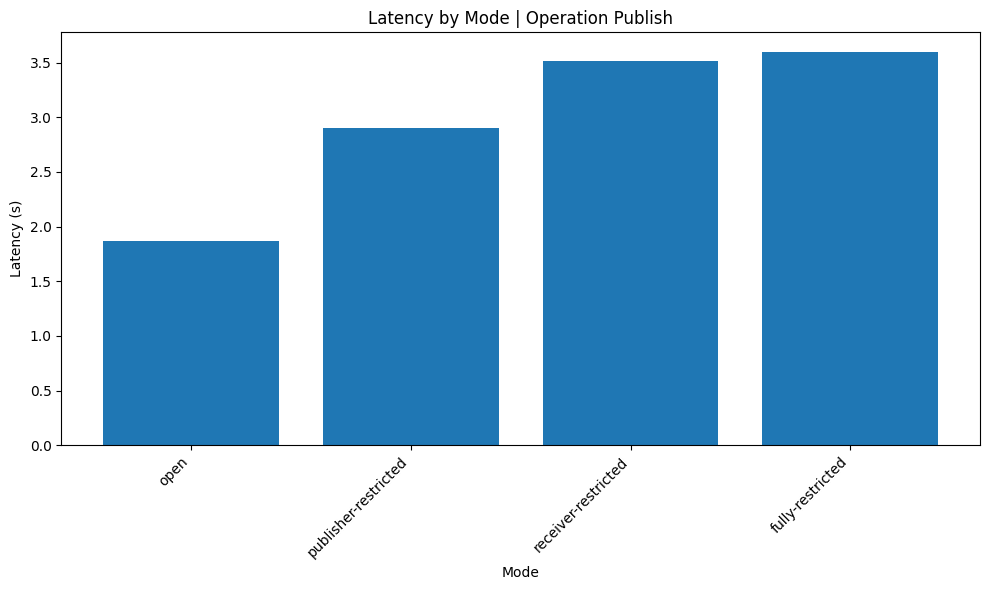

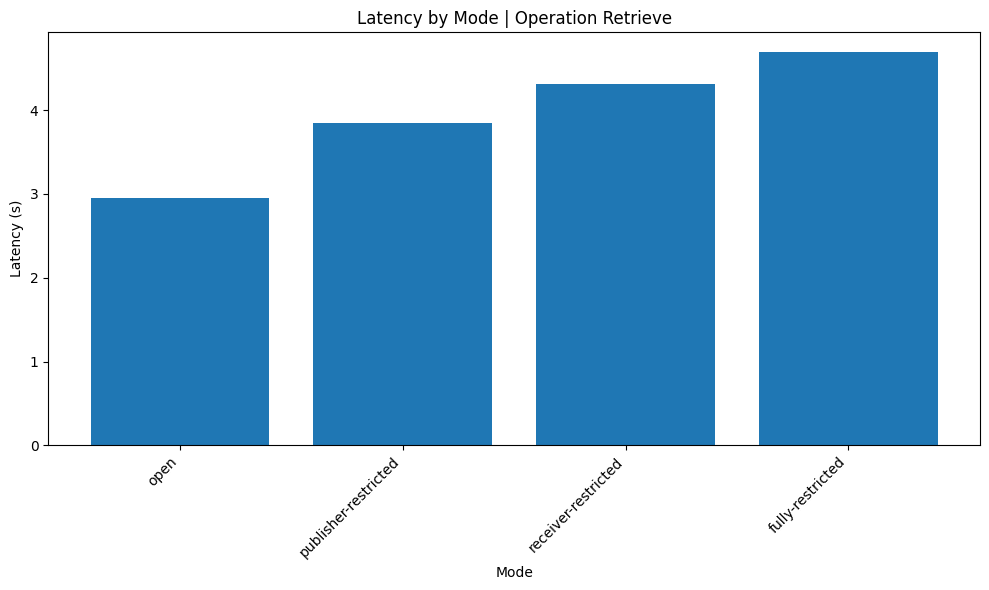

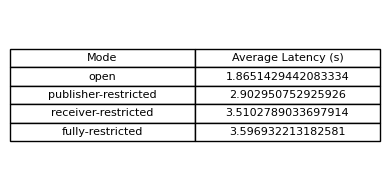

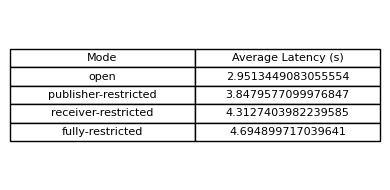

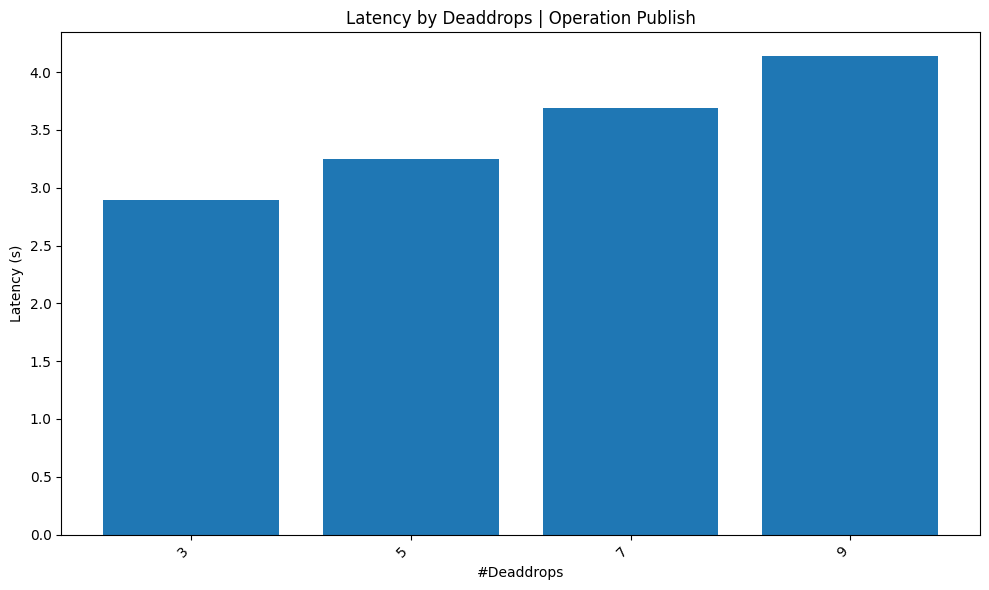

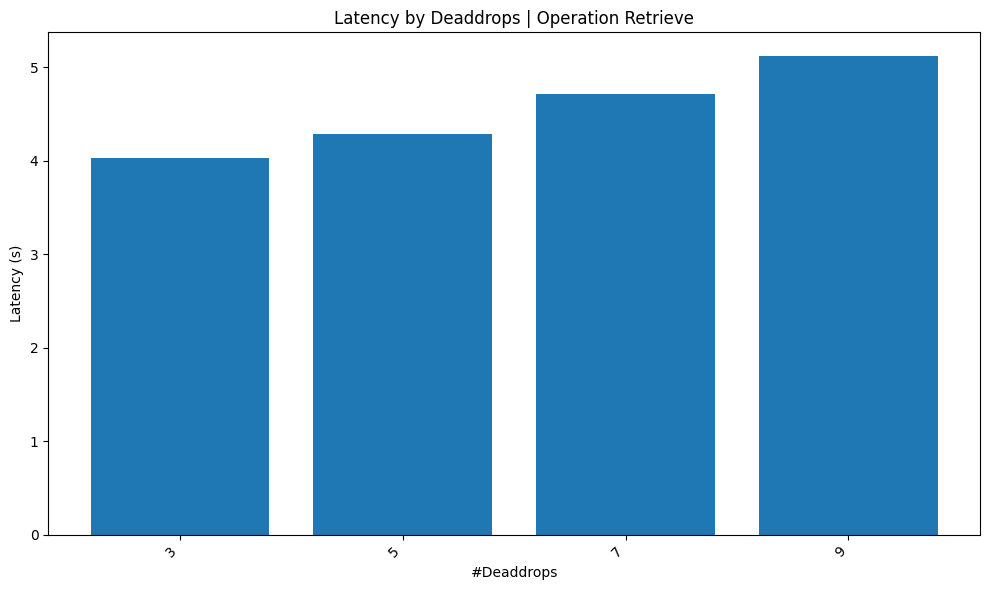

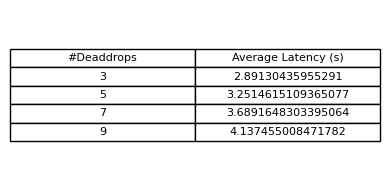

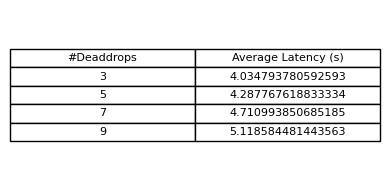

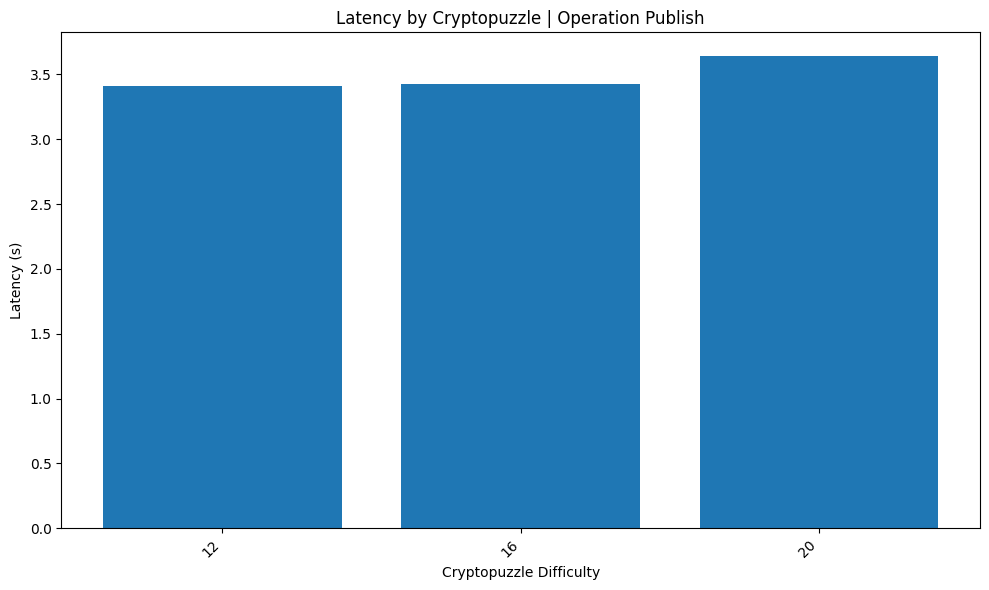

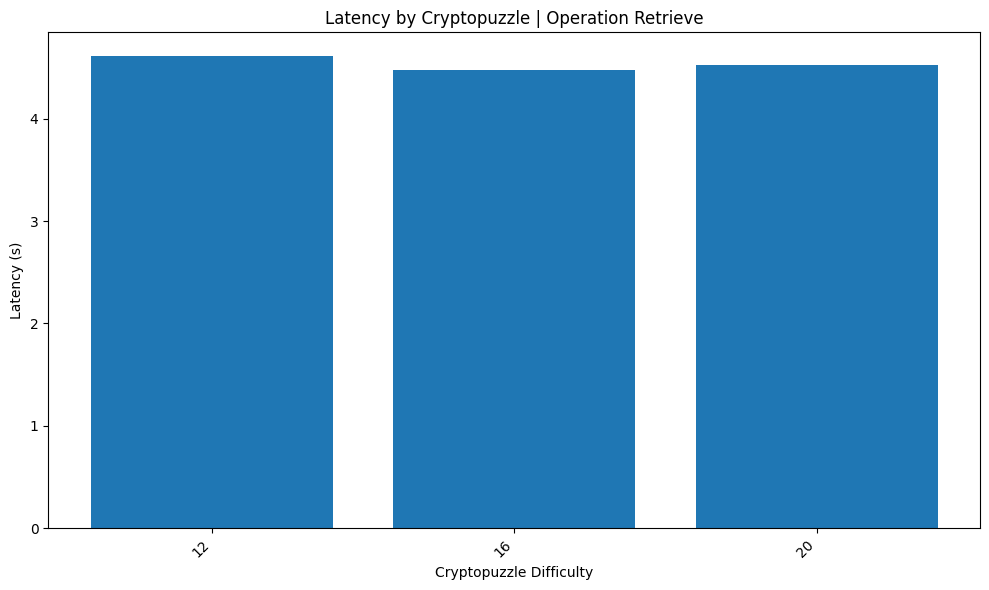

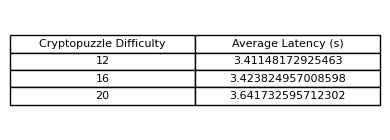

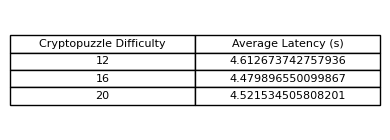

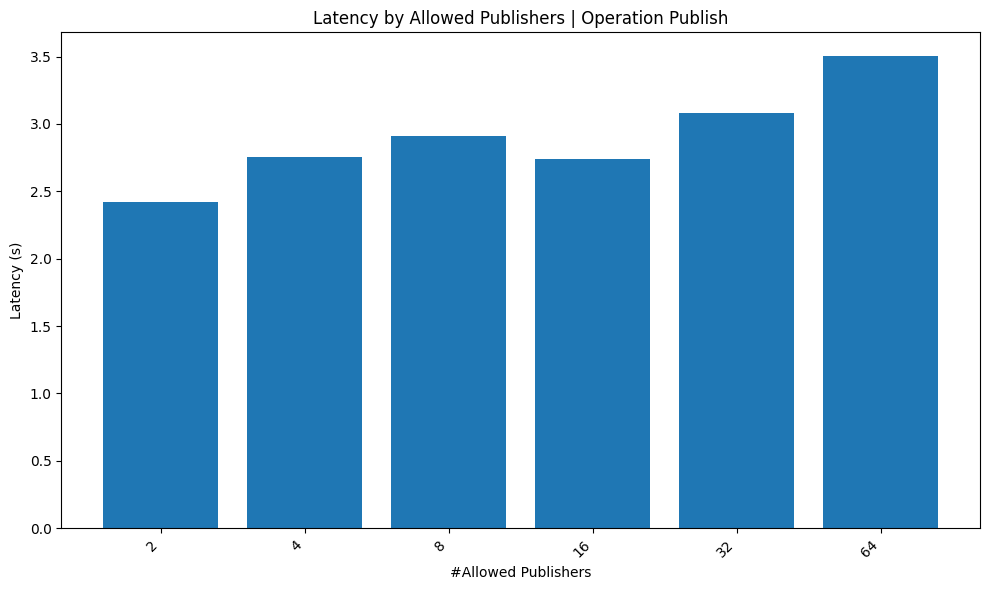

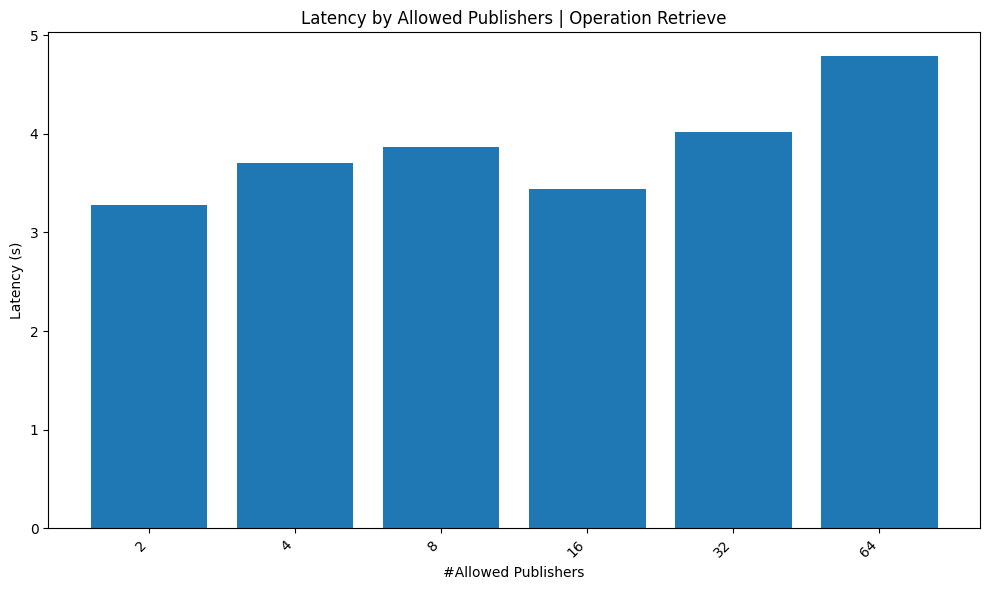

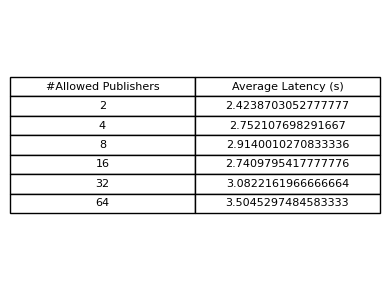

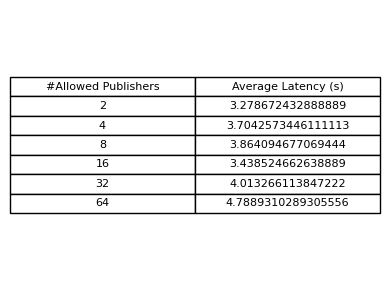

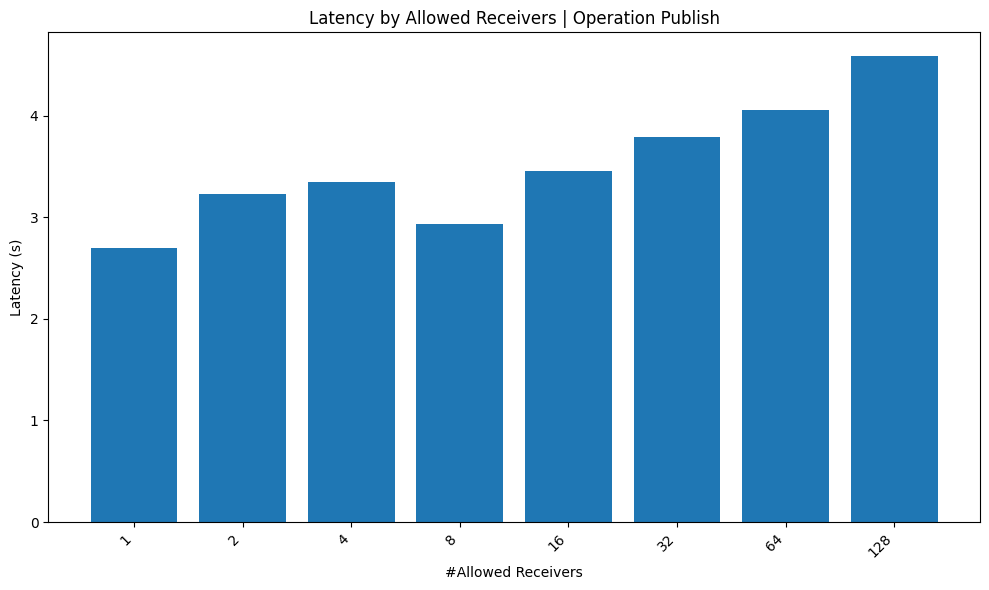

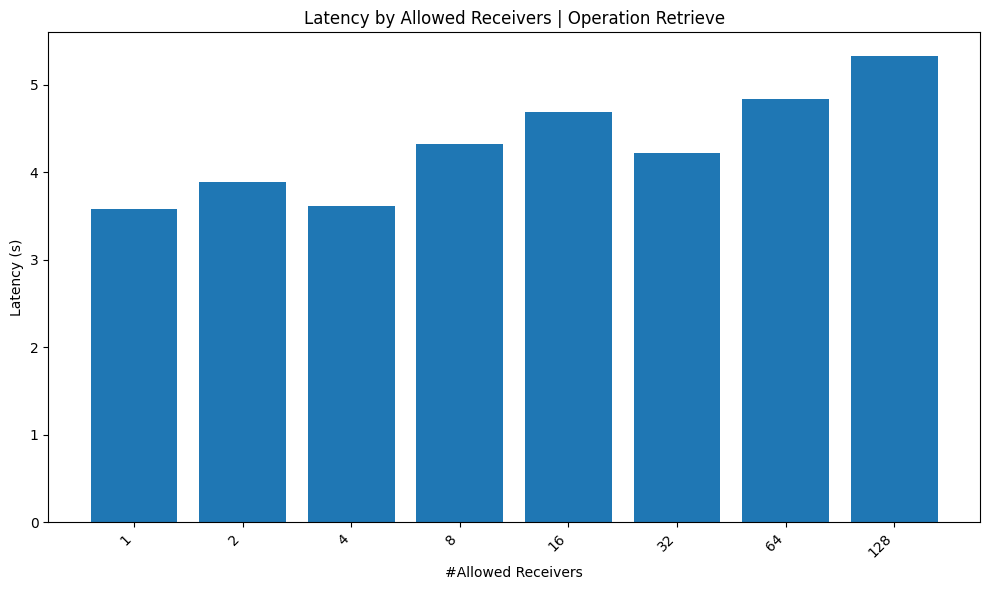

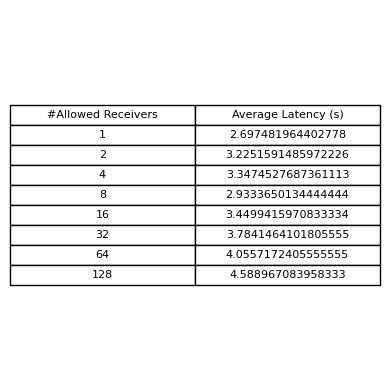

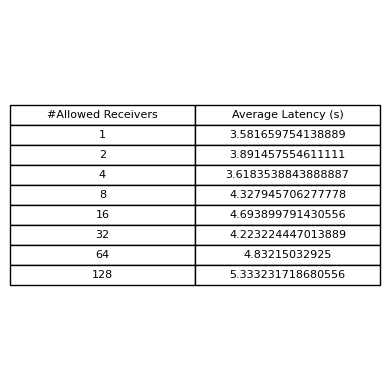

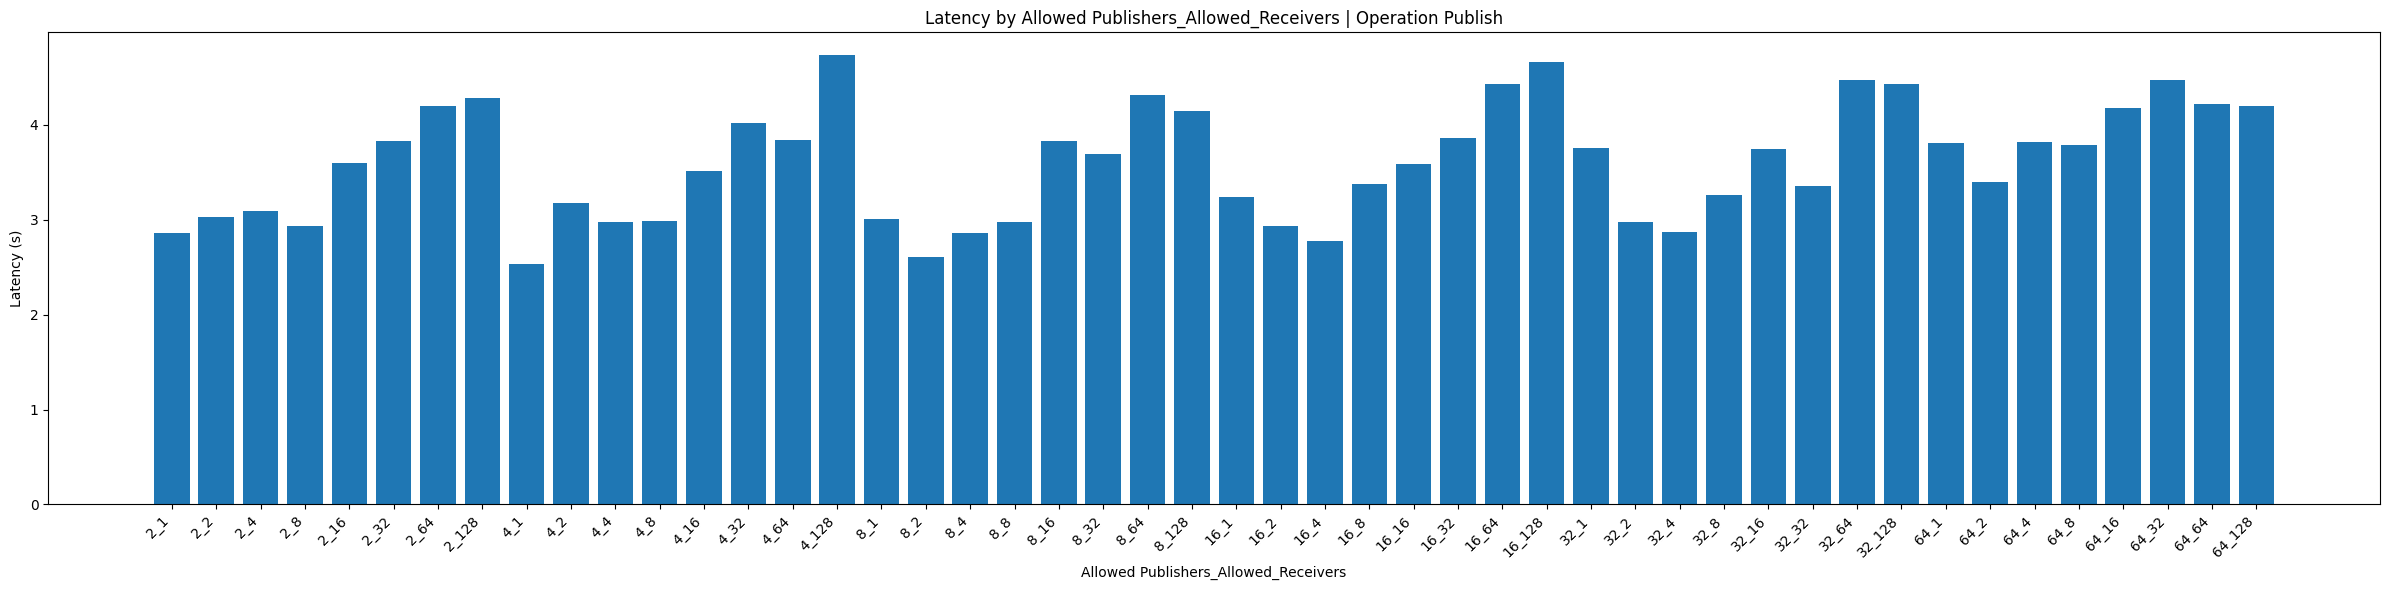

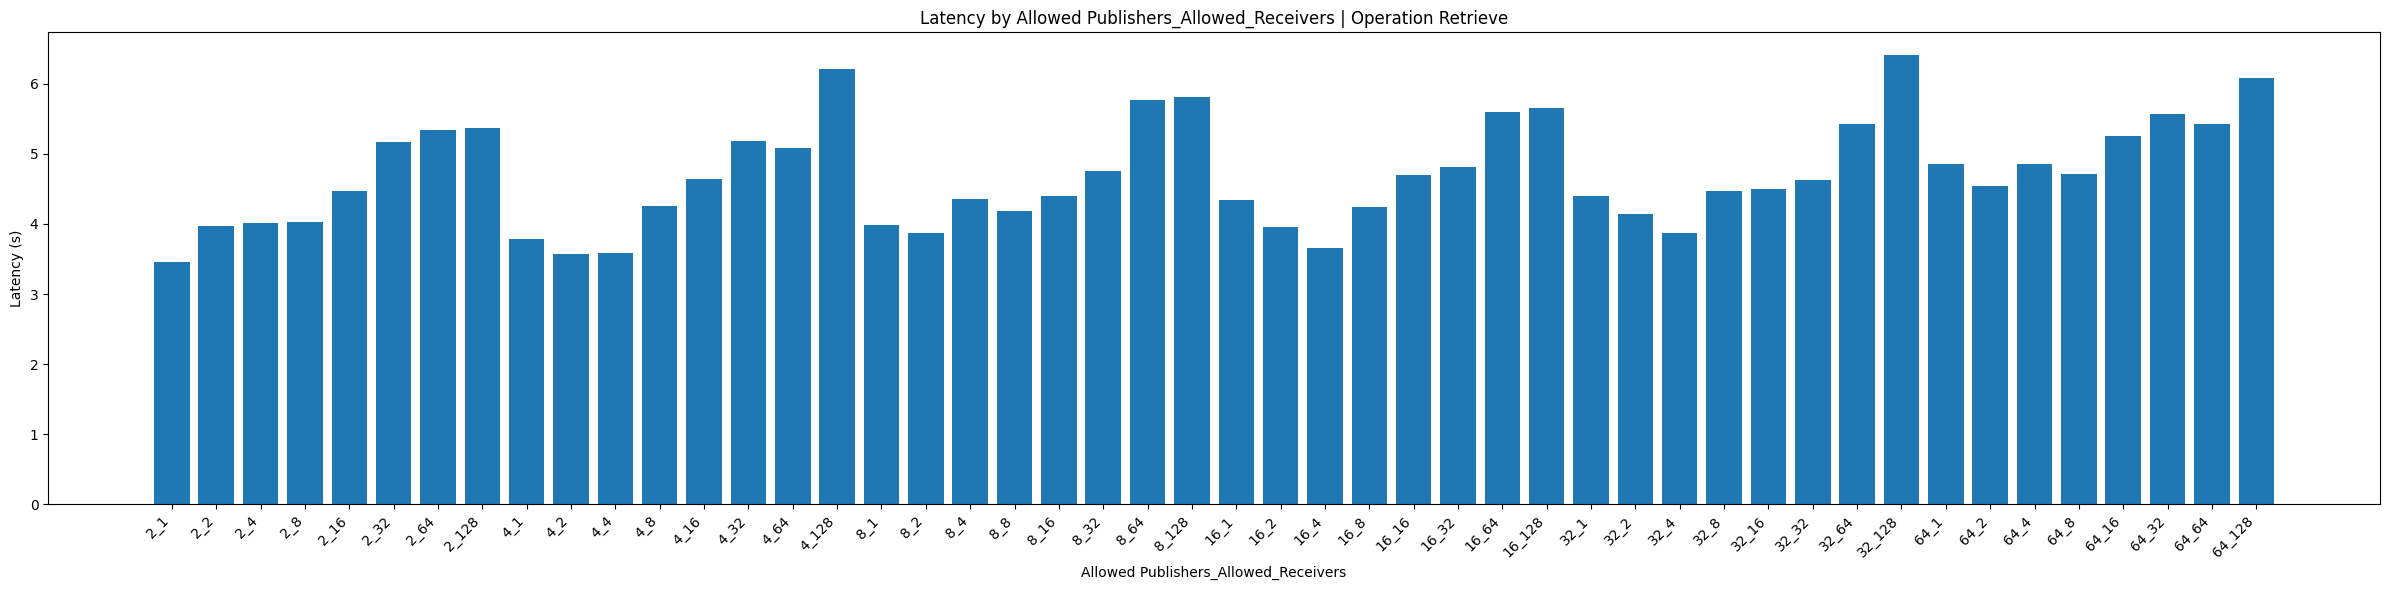

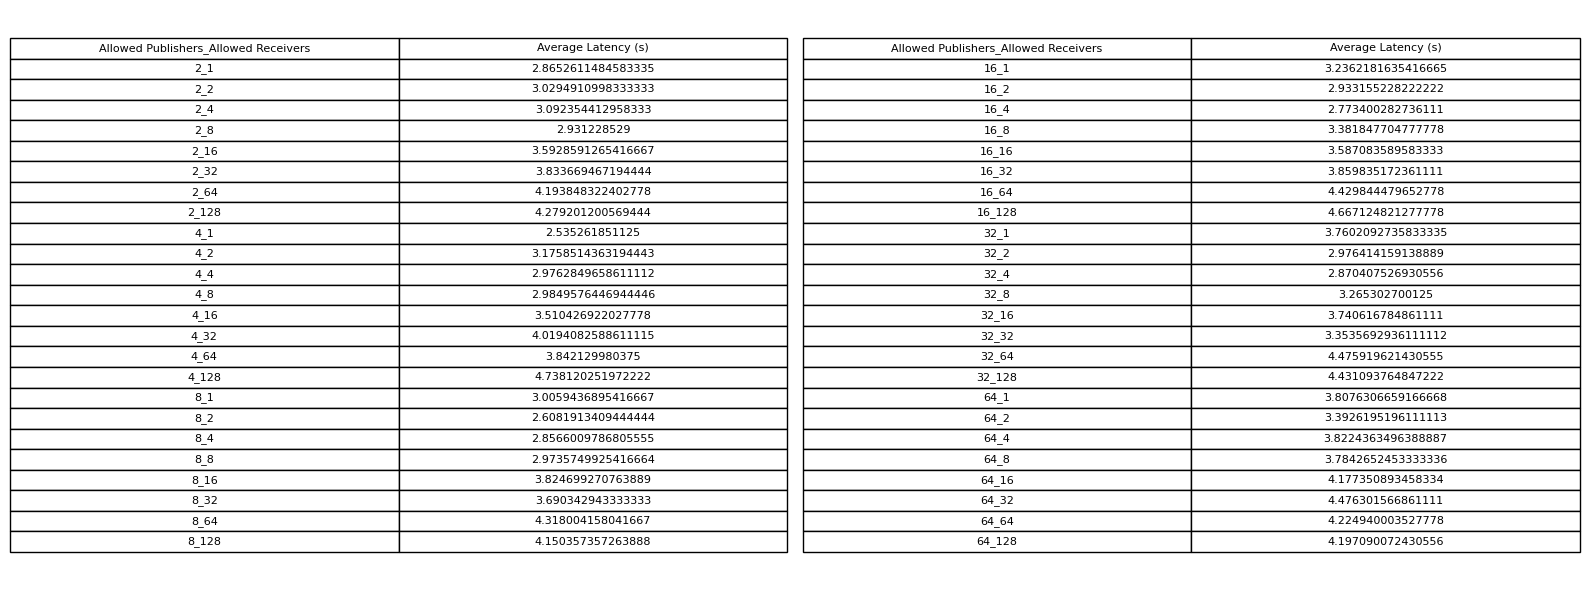

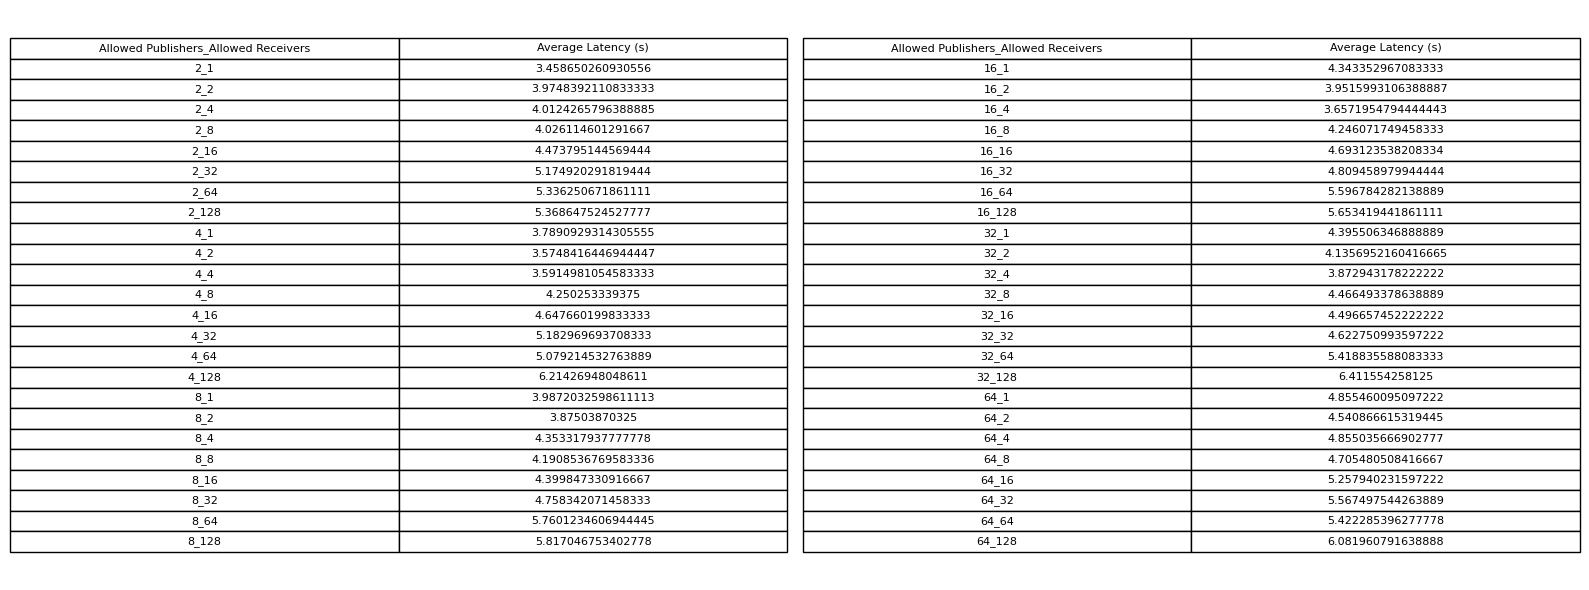

In [19]:
# Barras em que a primeira barra é do open com uma configuração comum e depois comparar com as outras configurações sender, receiver, fully restricted
create_bar_graph(mode_latency_publish, "Mode", "Latency (s)", "Latency by Mode | Operation Publish", "./graphics/mode_latency_publish.pdf")
create_bar_graph(mode_latency_retrieve, "Mode", "Latency (s)", "Latency by Mode | Operation Retrieve", "./graphics/mode_latency_retrieve.pdf")
create_table(mode_latency_publish, ["Mode", "Average Latency (s)"], "./graphics/mode_latency_publish_table.pdf")
create_table(mode_latency_retrieve, ["Mode", "Average Latency (s)"], "./graphics/mode_latency_retrieve_table.pdf")

# Ver como influnecia os Deaddrops
create_bar_graph(deaddrops_latency_publish, "#Deaddrops", "Latency (s)", "Latency by Deaddrops | Operation Publish", "./graphics/deaddrops_latency_publish.pdf")
create_bar_graph(deaddrops_latency_retrieve, "#Deaddrops", "Latency (s)", "Latency by Deaddrops | Operation Retrieve", "./graphics/deaddrops_latency_retrieve.pdf")
create_table(deaddrops_latency_publish, ["#Deaddrops", "Average Latency (s)"], "./graphics/deaddrops_latency_publish_table.pdf")
create_table(deaddrops_latency_retrieve, ["#Deaddrops", "Average Latency (s)"], "./graphics/deaddrops_latency_retrieve_table.pdf")

# Ver como influencia os Cryptopuzzle
create_bar_graph(cryptopuzzle_latency_publish, "Cryptopuzzle Difficulty", "Latency (s)", "Latency by Cryptopuzzle | Operation Publish", "./graphics/cryptopuzzle_latency_publish.pdf")
create_bar_graph(cryptopuzzle_latency_retrieve, "Cryptopuzzle Difficulty", "Latency (s)", "Latency by Cryptopuzzle | Operation Retrieve", "./graphics/cryptopuzzle_latency_retrieve.pdf")
create_table(cryptopuzzle_latency_publish, ["Cryptopuzzle Difficulty", "Average Latency (s)"], "./graphics/cryptopuzzle_latency_publish_table.pdf")
create_table(cryptopuzzle_latency_retrieve, ["Cryptopuzzle Difficulty", "Average Latency (s)"], "./graphics/cryptopuzzle_latency_retrieve_table.pdf")

# Publisher Restricted como afeta os allowed senders
create_bar_graph(sender_restricted_as_latency_publish, "#Allowed Publishers", "Latency (s)", "Latency by Allowed Publishers | Operation Publish", "./graphics/sender_restricted_as_latency_publish.pdf")
create_bar_graph(sender_restricted_as_latency_retrieve, "#Allowed Publishers", "Latency (s)", "Latency by Allowed Publishers | Operation Retrieve", "./graphics/sender_restricted_as_latency_retrieve.pdf")
create_table(sender_restricted_as_latency_publish, ["#Allowed Publishers", "Average Latency (s)"], "./graphics/sender_restricted_as_latency_publish_table.pdf")
create_table(sender_restricted_as_latency_retrieve, ["#Allowed Publishers", "Average Latency (s)"], "./graphics/sender_restricted_as_latency_retrieve_table.pdf")

# Receiver Restricted como afeta os allowed receivers
create_bar_graph(receiver_restricted_ar_latency_publish,"#Allowed Receivers", "Latency (s)", "Latency by Allowed Receivers | Operation Publish", "./graphics/receiver_restricted_ar_latency_publish.pdf")
create_bar_graph(receiver_restricted_ar_latency_retrieve, "#Allowed Receivers", "Latency (s)", "Latency by Allowed Receivers | Operation Retrieve", "./graphics/receiver_restricted_ar_latency_retrieve.pdf")
create_table(receiver_restricted_ar_latency_publish, ["#Allowed Receivers", "Average Latency (s)"], "./graphics/receiver_restricted_ar_latency_publish_table.pdf")
create_table(receiver_restricted_ar_latency_retrieve, ["#Allowed Receivers", "Average Latency (s)"], "./graphics/receiver_restricted_ar_latency_retrieve_table.pdf")

# Fully Restricted como afeta os allowed receivers e senders
create_bar_graph(fully_restricted_as_ar_latency_publish, "Allowed Publishers_Allowed_Receivers", "Latency (s)", "Latency by Allowed Publishers_Allowed_Receivers | Operation Publish", "./graphics/fully_restricted_as_ar_latency_publish.pdf")
create_bar_graph(fully_restricted_as_ar_latency_retrieve, "Allowed Publishers_Allowed_Receivers", "Latency (s)", "Latency by Allowed Publishers_Allowed_Receivers | Operation Retrieve", "./graphics/fully_restricted_as_ar_latency_retrieve.pdf")
create_table_side_by_side(fully_restricted_as_ar_latency_publish, ["Allowed Publishers_Allowed Receivers", "Average Latency (s)"],"./graphics/fully_restricted_as_ar_latency_publish_table.pdf")
create_table_side_by_side(fully_restricted_as_ar_latency_retrieve, ["Allowed Publishers_Allowed Receivers", "Average Latency (s)"], "./graphics/fully_restricted_as_ar_latency_retrieve_table.pdf")

Prepare Data for Scalability Publish

In [ ]:
throughput_latency_size_per_message_publish_scalability = {json['message_size']: [] for json in test_results_publish_scalability}

def map_publish_scalability_metrics(jsons_scalability,throughput_latency_size_per_message_publish_scalability):
    jsons_scalability = sorted(jsons_scalability, key=lambda x: x['clients'])  
    for json in jsons_scalability:
        clients = json['clients']
        min_time = min([message['timestamp'] for message in json['messages']])
        max_time = max([(message['timestamp'] + message['latency']) for message in json['messages']]) 
        latency_sum = sum([message['latency'] for message in json['messages']])
        messages_number = len(json['messages'])
        throughput = messages_number/(max_time - min_time)
        latency = latency_sum/messages_number
        size_per_message = json['message_size']
        throughput_latency_size_per_message_publish_scalability[size_per_message].append((throughput, latency))

Build Graphics Scalability Publish

In [ ]:
map_publish_scalability_metrics(test_results_publish_scalability,throughput_latency_size_per_message_publish_scalability)
save_to_pickle(throughput_latency_size_per_message_publish_scalability, './pickle/scalability/throughput_latency_size_per_message_publish_scalability.pickle')

In [11]:
throughput_latency_size_per_message_publish_scalability = load_from_pickle('./pickle/scalability/throughput_latency_size_per_message_publish_scalability.pickle')

In [ ]:
# Multi Line Graph: Throughput vs Latency Publish Where each line has a different Size per Message

create_multi_line_graph(transform_map_to_graphic_format(throughput_latency_size_per_message_publish_scalability), "Throughput (requests/s)", "Latency (s)", "Publish Scalability per Message Size", "./graphics/publish_scalability_per_message_size.pdf", "Bytes")

Prepare Data for Scalability Retrieve

In [ ]:
throughput_latency_size_per_message_retrieve_scalability = {json['message_size']: [] for json in test_results_retrieve_scalability}
throughput_latency_number_messages_retrieve_scalability = {json['message_count']: [] for json in test_results_retrieve_scalability}

def map_retrieve_scalability_metrics(jsons_scalability, throughput_latency_size_per_message_retrieve_scalability, throughput_latency_number_messages_retrieve_scalability):
    jsons_scalability = sorted(jsons_scalability, key=lambda x: x['clients'])  
    for json in jsons_scalability:
        clients = json['clients']
        min_time = min([message['timestamp'] for message in json['message_fetches']])
        max_time = max([(message['timestamp'] + message['latency']) for message in json['message_fetches']])
        latency_sum = sum([message['latency'] for message in json['message_fetches']])
        messages_number = len(json['message_fetches'])
        size_per_message = json['message_size']
        retrieved_messages= json['message_count']
        throughput = messages_number/(max_time - min_time)
        latency = latency_sum/messages_number

        if size_per_message == 1024:
            throughput_latency_number_messages_retrieve_scalability[retrieved_messages].append((throughput, latency))
        
        if retrieved_messages == 10:
            throughput_latency_size_per_message_retrieve_scalability[size_per_message].append((throughput, latency))


Build Graphics Scalability Retrieve

In [ ]:
map_retrieve_scalability_metrics(test_results_retrieve_scalability, throughput_latency_size_per_message_retrieve_scalability, throughput_latency_number_messages_retrieve_scalability)
save_to_pickle(throughput_latency_size_per_message_retrieve_scalability, './pickle/scalability/throughput_latency_size_per_message_retrieve_scalability.pickle')
save_to_pickle(throughput_latency_number_messages_retrieve_scalability, './pickle/scalability/throughput_latency_number_messages_retrieve_scalability.pickle')

In [12]:
throughput_latency_size_per_message_retrieve_scalability = load_from_pickle('./pickle/scalability/throughput_latency_size_per_message_retrieve_scalability.pickle')
throughput_latency_number_messages_retrieve_scalability = load_from_pickle('./pickle/scalability/throughput_latency_number_messages_retrieve_scalability.pickle')

In [ ]:
# Multi Line Graph: Throughput vs Latency Publish Where each line has a different Size per Message
create_multi_line_graph(transform_map_to_graphic_format(throughput_latency_size_per_message_retrieve_scalability), "Throughput (requests/s)", "Latency (s)", "Retrieve Scalability per Message Size", "./graphics/retrieve_scalability_per_message_size.pdf", "Bytes")

# Multi Line Graph: Throughput vs Latency Publish Where each line has a number of messages
create_multi_line_graph(transform_map_to_graphic_format(throughput_latency_number_messages_retrieve_scalability), "Throughput (requests/s)", "Latency (s)", "Retrieve Scalability per Number of Messages Returned", "./graphics/retrieve_scalability_per_prepared_messages.pdf", "Messages")